In [1]:
import pandas as pd
import numpy as np

In [2]:
DB_PATH = "Simulation/FSN_Data_5k.db"

In [3]:
from NetEmbs import *
CONFIG.ROOT_FOLDER = "UvA/Refactoring/"
updateCONFIG_4experiments()

I0803 21:21:38.299687 4644464064 update_config.py:37] Started..


Config file has been updated!
Working directory is  UvA/Refactoring/verMetaDiff_dirCOMBI_walks30_pressure10_/windowSize2/EMB8_batch256_NegSamples512_TFsteps50000_/


## Upload data as Journal Entries

In [4]:
data = upload_data(DB_PATH, limit=None)
journal_truth = upload_journal_entries(DB_PATH)[["ID", "GroundTruth", "Time"]]

In [5]:
d = data_preprocessing(data)
d.head(2)

,ID,Signature,FA_Name,Credit,Debit,Name,Value,amount,flow
0,7,"([('NoisyLeftFA_kbfq', 0.00041), ('NoisyLeftFA...",FixedAssets,0.000000,1.0,FixedAssets_11,52.184404,52.184404,inflow
1,7,"([('NoisyLeftFA_kbfq', 0.00041), ('NoisyLeftFA...",NoisyLeftFA_kbfq,0.000406,0.0,NoisyLeftFA_kbfq_11,-0.021187,0.021187,outflow


### Construct FSN object

In [6]:
fsn = FSN()
fsn.build(d, left_title="FA_Name")

I0803 21:21:55.843046 4644464064 graph.py:54] FSN constructed!
I0803 21:21:55.845312 4644464064 graph.py:55] Number of Business processes nodes is 5109


In [7]:
set_font()
# draw_fsn(fsn, add_node_labels=False)

<BarContainer object of 10 artists>

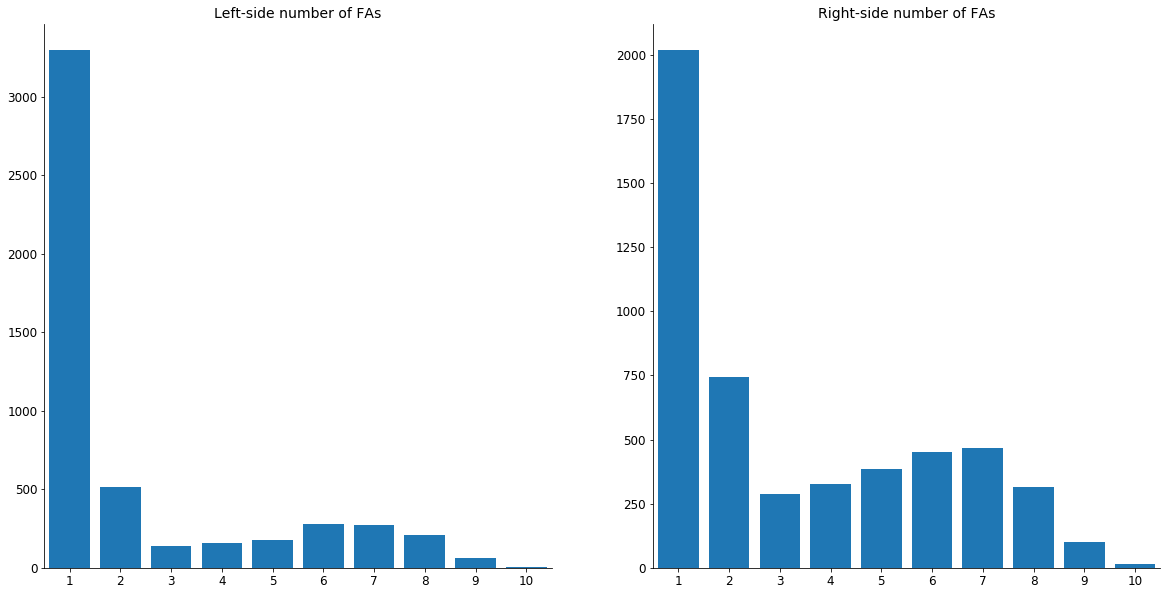

In [8]:
draw.financial_accounts_histograms(d)

## Get Embeddings

In [9]:
# 4.  ///////// Getting Skip-Grams \\\\\\\\\\\\
skip_grams, tr = get_SkipGrams(fsn, use_cache=True)
# 5.  ///////// Getting embeddings \\\\\\\\\\\\
embeddings = get_embeddings(skip_grams, tr)

I0803 21:22:11.781589 4644464064 construct_skip_grams.py:82] Loading SkipGrams from cache... wait...
I0803 21:22:12.698191 4644464064 get_embeddings.py:55] Initialising TF model
W0803 21:22:12.699149 4644464064 deprecation_wrapper.py:119] From /Users/lex/Dev/GitHub/NetEmbs/NetEmbs/SkipGram/tf_model/get_embeddings.py:60: The name tf.reset_default_graph is deprecated. Please use tf.compat.v1.reset_default_graph instead.

W0803 21:22:12.714348 4644464064 deprecation_wrapper.py:119] From /Users/lex/Dev/GitHub/NetEmbs/NetEmbs/SkipGram/tf_model/get_embeddings.py:64: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0803 21:22:12.718351 4644464064 deprecation_wrapper.py:119] From /Users/lex/Dev/GitHub/NetEmbs/NetEmbs/SkipGram/tf_model/get_embeddings.py:66: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0803 21:22:12.730624 4644464064 deprecation_wrapper.py:119] From /Users/lex/Dev/GitHub/NetEmbs/NetEmbs/SkipGram/tf_model/g

Current TensorFlow parameters: 
 Embedding size:  8 
 Steps:  50000
 Batch size:  256


W0803 21:22:13.086179 4644464064 deprecation_wrapper.py:119] From /Users/lex/Dev/GitHub/NetEmbs/NetEmbs/SkipGram/tf_model/get_embeddings.py:93: The name tf.summary.merge_all is deprecated. Please use tf.compat.v1.summary.merge_all instead.

W0803 21:22:13.087508 4644464064 deprecation_wrapper.py:119] From /Users/lex/Dev/GitHub/NetEmbs/NetEmbs/SkipGram/tf_model/get_embeddings.py:94: The name tf.summary.FileWriter is deprecated. Please use tf.compat.v1.summary.FileWriter instead.

W0803 21:22:13.153685 4644464064 deprecation_wrapper.py:119] From /Users/lex/Dev/GitHub/NetEmbs/NetEmbs/SkipGram/tf_model/get_embeddings.py:96: The name tf.global_variables_initializer is deprecated. Please use tf.compat.v1.global_variables_initializer instead.

I0803 21:22:13.156093 4644464064 get_embeddings.py:129] Loading Embeddings from cache... wait...


Loaded Embeddings from cache!


In [10]:
embeddings = embeddings.merge(journal_truth, on="ID")

In [11]:
embeddings = cl_Agglomerative(embeddings, 11)

I0803 21:22:14.173374 4644464064 agglomerative.py:38] Agglomerative clustering - DONE


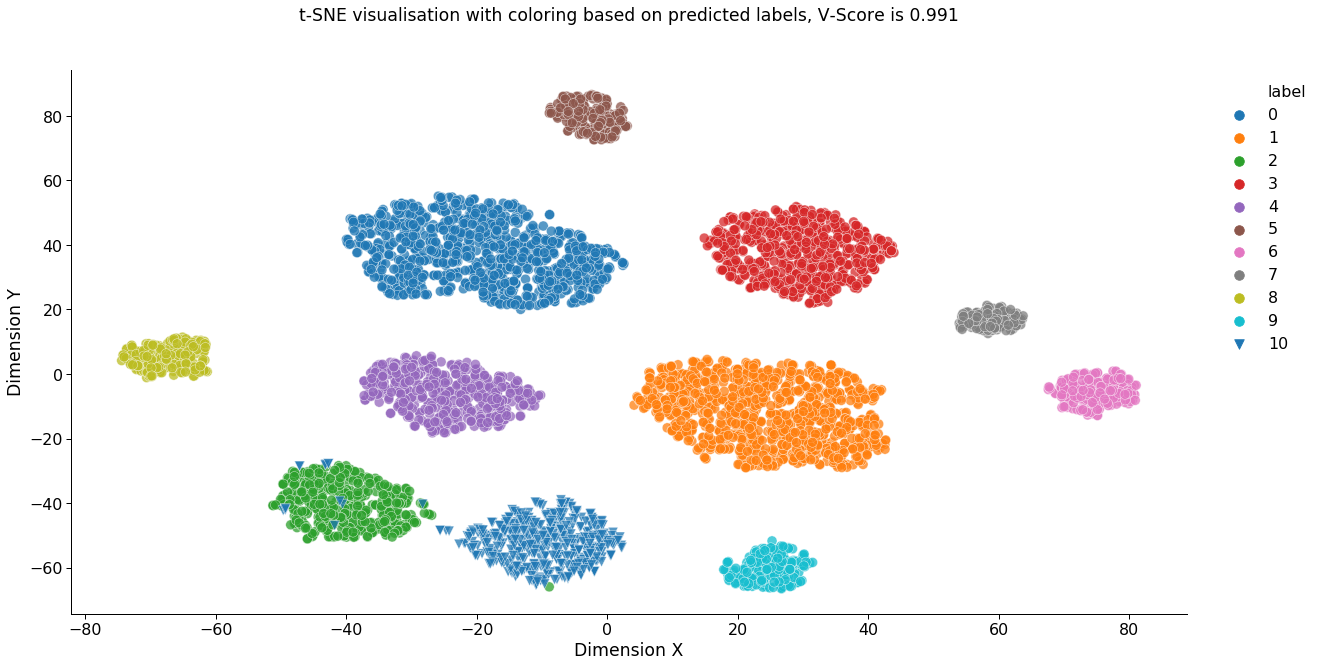

In [12]:
draw.embeddings_2D(embeddings, legend_title="label", context="paper_full")

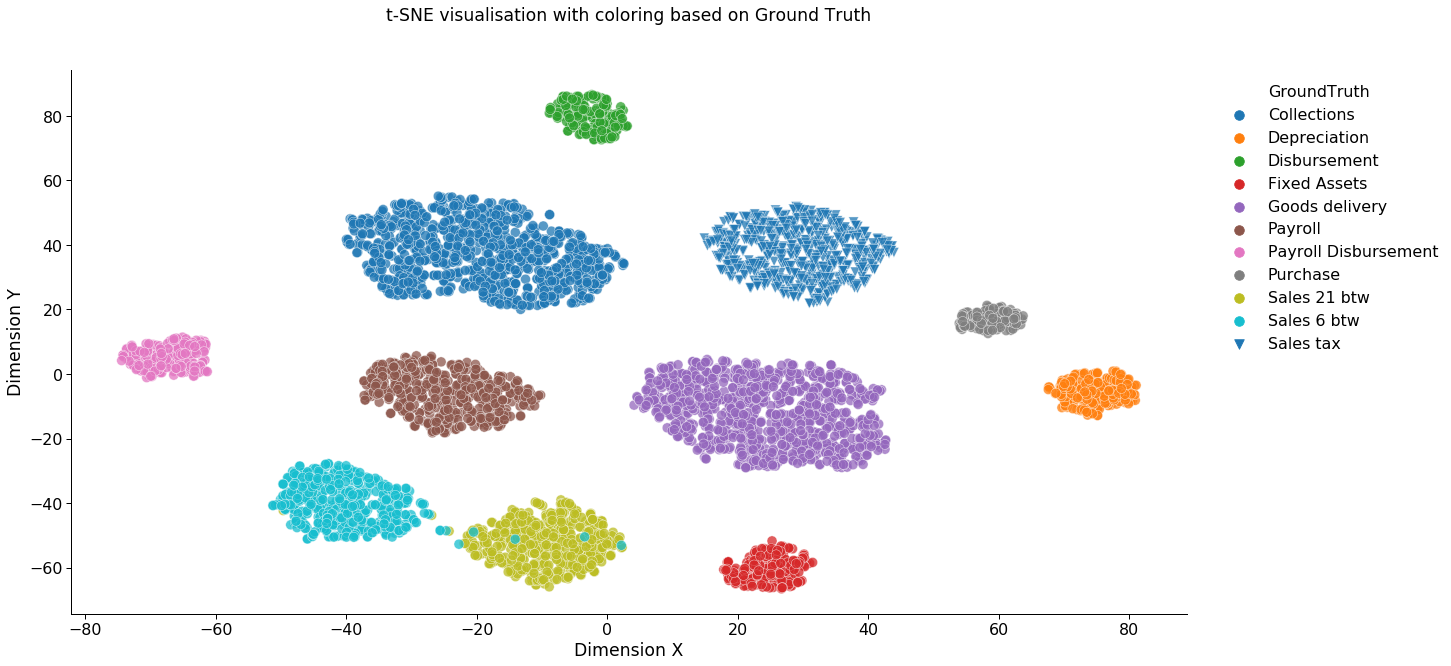

In [13]:
draw.embeddings_2D(embeddings, legend_title="GroundTruth")

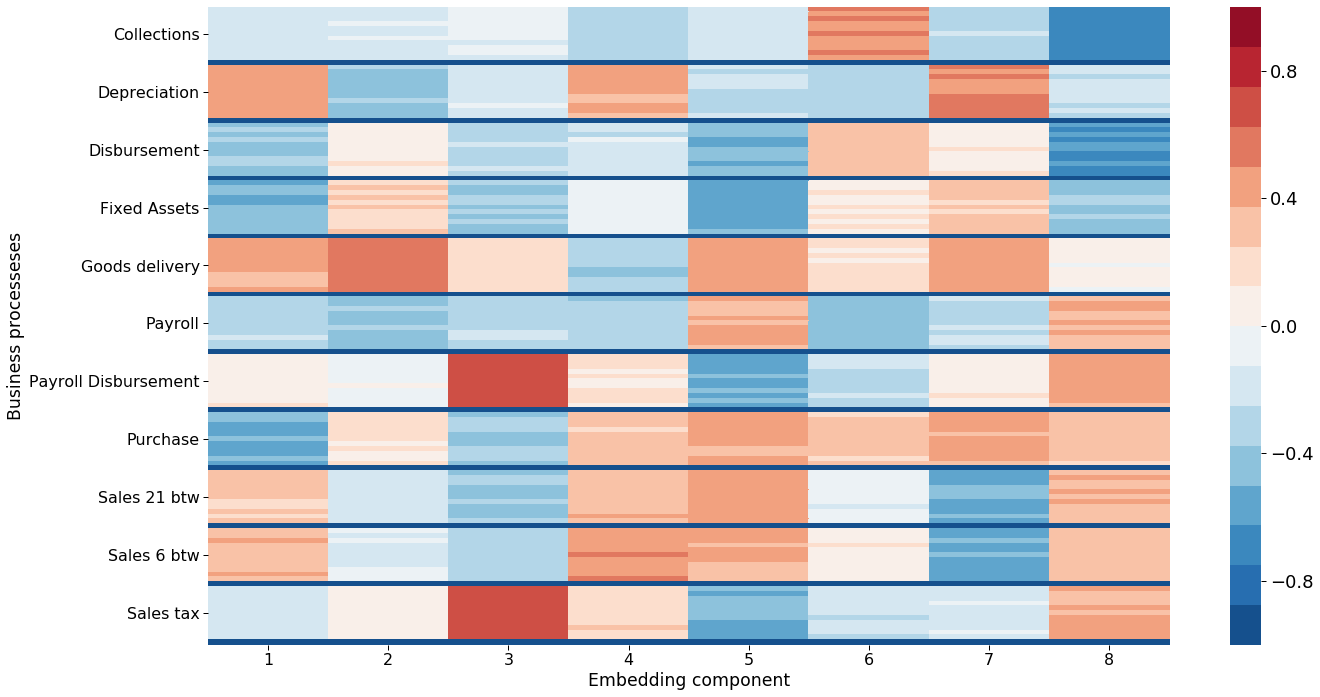

In [14]:
draw.embeddings_as_heatmap(embeddings)

# Interactive visualisation

In [15]:
from __future__ import print_function
# Standard plotly imports
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot, plot, init_notebook_mode
# Using plotly + cufflinks in offline mode
import cufflinks

cufflinks.go_offline(connected=True)
init_notebook_mode(connected=True)
from ipywidgets import interactive, HBox, VBox, widgets

In [16]:
d.head(2)

,ID,Signature,FA_Name,Credit,Debit,Name,Value,amount,flow
0,7,"([('NoisyLeftFA_kbfq', 0.00041), ('NoisyLeftFA...",FixedAssets,0.000000,1.0,FixedAssets_11,52.184404,52.184404,inflow
1,7,"([('NoisyLeftFA_kbfq', 0.00041), ('NoisyLeftFA...",NoisyLeftFA_kbfq,0.000406,0.0,NoisyLeftFA_kbfq_11,-0.021187,0.021187,outflow


In [17]:
from NetEmbs.Vis.helpers import set_font, getColors_Markers
# Label text
description = widgets.Label(
        value=''
    )
# WordCouds area
wordCloudsOutput = widgets.Output()
# Table with JournalEntries data
table_titles = ["ID", "FA_Name", "Credit", "Debit", "label"]
format_style = [[None], [None], ['.4f'], ['.4f'], [None]]

if MODE == "RealData":
    table_titles = ["ID", "FA_Name", "accountDesc", "Credit", "Debit", "label"]
    format_style = [[None], [None], [None], ['.4f'], ['.4f'], [None]]

t = go.FigureWidget([go.Table(
    header=dict(values=table_titles,
                fill = dict(color='#E5F1DC'),
                align = ['center'] * 5),
    cells=dict(values=[],
               format = format_style,
#                fill = dict(color='white'),
               align = ['center'] * 5))],
                    layout = go.Layout(
                            title="Journal Entries",
                            autosize=True,
                            width=1000,
                            height=400))    

# Scatter plot
N_COLORS = 10
WORD_CLOUD_LABEL = "FA_Name"
# LEGEND_TITLE = "GroundTruth"
LEGEND_TITLE = "label"

tmp_p_see = None
# For selection via multiple traces... stupid way.
indexes = []
tr_nums = 0


def interactiveScatter(df, df_info, legend_title="label"):
    """Create FigureWidget with the scatter plot for the given DataFrame"""
    scatter_data = list()
    cmap, mmap = getColors_Markers(keys=df[legend_title].unique(), cm="tab10", n_colors=N_COLORS, markers=["circle", "diamond", "square"])
    for name, group in df.groupby(legend_title):
        scatter_data.append(go.Scatter(x=group.x, y=group.y, mode='markers', name=name, 
                                    text = group.apply(lambda row: f"ID={row.ID},   GroundTruth={row.GroundTruth}", axis=1),
                                    customdata = group.index.to_list(),
                                    marker=dict(color=cmap[name][1], 
                                                symbol=mmap[name])))
    f = go.FigureWidget(data=scatter_data,
                       layout = go.Layout(
                           title=f"t-SNE visualisation with coloring based on {legend_title}",
        hovermode='closest',
        autosize=True,
        width=1000,
        height=700))
    
    def printSignature(trace, points, *args):
        if len(points.point_inds)>0:
            ids = trace.customdata[points.point_inds[0]]
            row = df.iloc[ids]
            description.value = f"ID={row.ID},   GroundTruth={row.GroundTruth}"
    def selectBP(trace, points, *args):
        if len(points.point_inds)>0:
            ids = trace.customdata[points.point_inds[0]]
            row = df.iloc[[ids]]
            chosen_bps = df_info.merge(row, on="ID")
            wordCloudsOutput.clear_output()
            t.data[0].cells.values = [chosen_bps[col] for col in t.data[0].header.values]
    
    def filterRows(selected_ids):
        row = df.iloc[selected_ids]
        chosen_bps = df_info.merge(row, on="ID")
        return chosen_bps
    def updateTable(chosen_bps):
        t.data[0].cells.values = [chosen_bps[col] for col in t.data[0].header.values]
    def showClouds(chosen_bps):
        wordCloudsOutput.clear_output()
        with wordCloudsOutput:
            draw.descriptor_for_cluster(chosen_bps, LEGEND_TITLE, WORD_CLOUD_LABEL, sort_mode="freq", n_top=4)
    scatters = f.data
    max_traces = len(scatters)
    def selectBPs(trace,points,selector):
        global indexes
        global tr_nums
#         print(f"For trace index={points.trace_index} tr_nums is {tr_nums}")
        if not points.point_inds:
            pass
        else:
            indexes.extend([trace.customdata[cur_point] for cur_point in points.point_inds])
        tr_nums = tr_nums+1
        if tr_nums==max_traces:
            selected_data = filterRows(indexes)
            updateTable(selected_data)
            showClouds(selected_data)
            indexes = []
            tr_nums = 0
    # Hover text: ID and GroundTruth
    for scatter in scatters:
        scatter.hoverinfo = 'text'
        scatter.on_hover(printSignature) 
        scatter.on_click(selectBP)
        scatter.on_selection(selectBPs)

    # Selection
    return f
# @interact(Coloring=['label', 'GroundTruth'])
# def update(Coloring="label"):
#     print(Coloring)
#     f_scatter = interactiveScatter(embs, Coloring)
#     return VBox([description, f_scatter])
f_scatter = interactiveScatter(embeddings, d, LEGEND_TITLE)
VBox([description, f_scatter, t, wordCloudsOutput])

    'data': [{'customdata': [27, 34, 38, ..., 5031, 5034, 5035]…